<a href="https://colab.research.google.com/github/Rahul21sai/ML_Mini_projects/blob/main/Gold_Price_Predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

while working regression we use co-rrelation 1.positive 2 negative

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [15]:
data = pd.read_csv('/content/gld_price_data.csv')
#data link = https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data

In [16]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [19]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [17]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [6]:
data.shape

(2290, 6)

In [7]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [22]:
#correlation
correlation = data.corr()

<ipython-input-22-791b6b1be51e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


<Axes: >

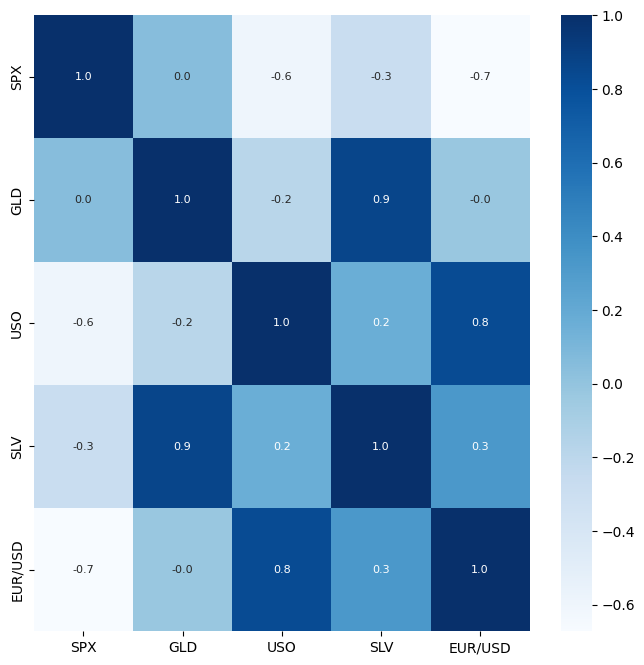

In [23]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation,cbar = True, fmt ='.1f',annot=True,annot_kws={'size':8}, cmap='Blues')

In [24]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-25-c34d8f3edcf9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

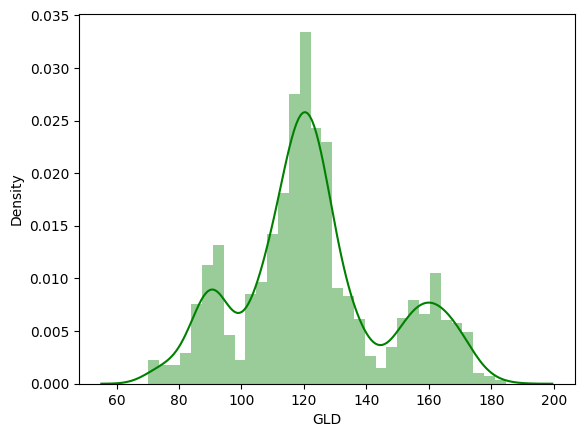

In [25]:
#checking the dsitribution
sns.distplot(data['GLD'],color='green')

In [27]:
#splitting data
x = data.drop(['GLD','Date'],axis = 1)
y = data['GLD']

In [28]:
print(x)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [29]:
#train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=2,test_size=0.2)

In [30]:
print(x.shape,x_train.shape,x_test.shape)

(2290, 4) (1832, 4) (458, 4)


RandomForestRegressor

In [35]:
#training the model
model = RandomForestRegressor(n_estimators=100)

In [36]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [37]:
#predcition
t_predicit = model.predict(x_test)

In [38]:
print(t_predicit)

[168.5222992   82.44489961 115.95670019 127.54090078 120.65620176
 154.66639721 150.53339872 126.32720049 117.38699889 126.03970073
 116.91180079 170.89620084 141.6721982  167.94139833 115.23340036
 117.51940065 139.26480271 170.39040139 159.54430247 161.25469931
 155.08410013 125.41230015 176.41149912 157.31680315 125.15420034
  93.92769955  77.55930006 120.78210002 119.12889946 167.54299983
  88.34880061 125.14570016  91.30060081 117.73570012 121.26529863
 136.21520071 115.45980123 115.12890079 149.47599958 107.3391009
 104.45510248  87.12229761 126.57920035 117.63309986 153.39299901
 119.75050019 108.27700016 107.88359845  93.08790047 126.97409835
  74.818      113.64339881 121.32330005 111.39189904 118.89189914
 120.87589944 157.94060036 169.8640004  147.0079965   85.70319862
  94.26510059  86.78769912  90.66109983 119.07960052 126.43960041
 127.47230028 169.19079985 122.33509934 117.55729891  98.80050057
 168.77780153 143.01069814 132.02440191 121.17520211 121.34239937
 119.811600

In [40]:
# R sqaure error
error_score = metrics.r2_score(y_test,t_predicit)
print(error_score*100)

98.92833054205366


In [41]:
#compare actual and predicit values
y_test = list(y_test)

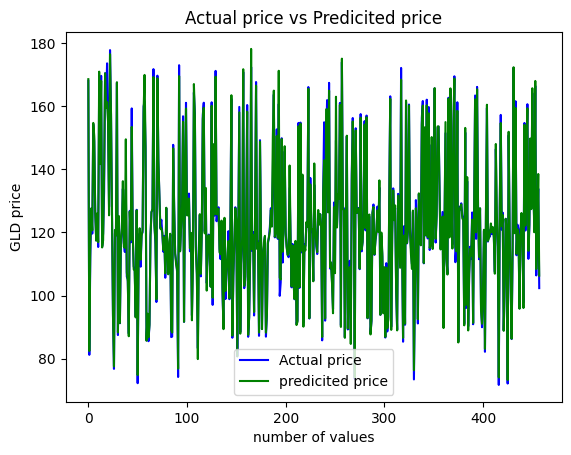

In [46]:
plt.plot(y_test, color = 'blue',label ='Actual price')
plt.plot(t_predicit, color ='green',label = 'predicited price')
plt.title('Actual price vs Predicited price')
plt.xlabel('number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()